In [19]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ( LogisticRegression )
from sklearn.preprocessing import ( StandardScaler )
from sklearn.decomposition import ( PCA )
from sklearn.cluster import ( KMeans )

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df_purchase = pd.read_csv('dataset/purchase_data.csv')

In [3]:
pca = pickle.load(open('data/pca.pickle', 'rb'))
scaler = pickle.load(open('data/scaler.pickle', 'rb'))
kmeans_pca = pickle.load(open('data/kmeans_pca.pickle', 'rb'))

In [4]:
features = df_purchase[ ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'] ]
df_purchase_segm_std = scaler.transform(features)

In [5]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [6]:
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [7]:
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix='Segment', prefix_sep='_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis=1)

In [9]:
df_pa = df_purchase_predictors

### Purchase Probability Model

In [10]:
Y = df_pa['Incidence']

In [11]:
X = pd.DataFrame()
X['Mean Price'] = (
    df_pa['Price_1'] +
    df_pa['Price_2'] +
    df_pa['Price_3'] +
    df_pa['Price_4'] +
    df_pa['Price_5']
) / 5

In [15]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [16]:
model_purchase.coef_

array([[-2.34803969]])

#### Price Elasticity of Purchase Probability

In [18]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [20]:
price_range = np.arange(0.5, 3.5, 0.01)

In [21]:
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [22]:
df_price_range = pd.DataFrame(price_range)

In [23]:
Y_prob = model_purchase.predict_proba(df_price_range)

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
Y_prob

array([[0.082191  , 0.917809  ],
       [0.08397972, 0.91602028],
       [0.08580374, 0.91419626],
       [0.08766358, 0.91233642],
       [0.08955978, 0.91044022],
       [0.09149288, 0.90850712],
       [0.09346343, 0.90653657],
       [0.09547196, 0.90452804],
       [0.09751901, 0.90248099],
       [0.09960511, 0.90039489],
       [0.10173081, 0.89826919],
       [0.10389665, 0.89610335],
       [0.10610314, 0.89389686],
       [0.10835083, 0.89164917],
       [0.11064024, 0.88935976],
       [0.1129719 , 0.8870281 ],
       [0.11534632, 0.88465368],
       [0.11776402, 0.88223598],
       [0.12022551, 0.87977449],
       [0.12273129, 0.87726871],
       [0.12528187, 0.87471813],
       [0.12787772, 0.87212228],
       [0.13051933, 0.86948067],
       [0.13320717, 0.86679283],
       [0.13594172, 0.86405828],
       [0.13872341, 0.86127659],
       [0.1415527 , 0.8584473 ],
       [0.14443002, 0.85556998],
       [0.14735578, 0.85264422],
       [0.1503304 , 0.8496696 ],
       [0.

In [25]:
purchase_pr = Y_prob[:][:, 1]

In [26]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [27]:
df_price_elasticities = pd.DataFrame(price_range)

In [28]:
df_price_elasticities = df_price_elasticities.rename(columns={"0": "Price_Point"})
df_price_elasticities['Mean_PE'] = pe

In [29]:
df_price_elasticities

,0,Mean_PE
0,0.50,-0.096494
1,0.51,-0.100566
2,0.52,-0.104765
3,0.53,-0.109094
4,0.54,-0.113557
...,...,...
295,3.45,-8.012939
296,3.46,-8.038187
297,3.47,-8.063400
298,3.48,-8.088579


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

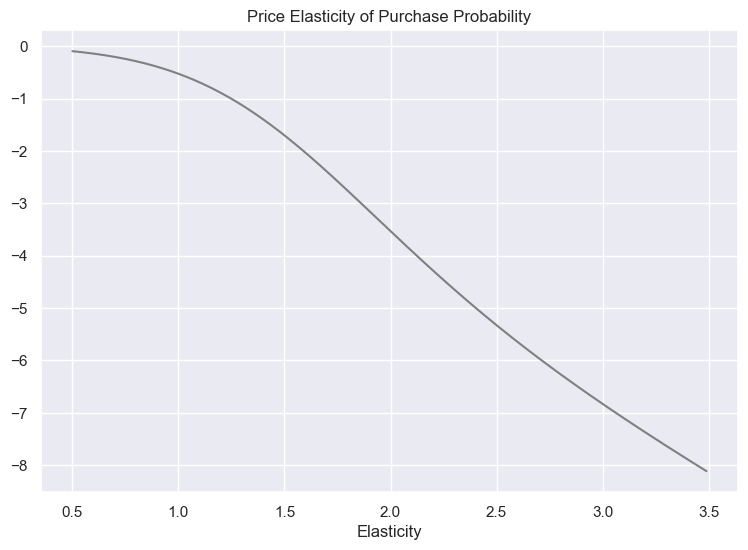

In [30]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability by Segments

#### Segment 1 - Career Focused

In [31]:
df_pa_segm_1 = df_pa[df_pa['Segment'] == 1]

In [32]:
Y = df_pa_segm_1['Incidence']

In [33]:
X = pd.DataFrame(
    df_pa_segm_1['Price_1'] + 
    df_pa_segm_1['Price_2'] + 
    df_pa_segm_1['Price_3'] + 
    df_pa_segm_1['Price_4'] + 
    df_pa_segm_1['Price_5']
) / 5

In [34]:
model_incidence_segment_1 = LogisticRegression(solver='sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [35]:
model_incidence_segment_1.coef_

array([[-1.71198304]])

In [36]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

In [37]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,0,Mean_PE,PE_Segment_1
0,0.50,-0.096494,-0.119004
1,0.51,-0.100566,-0.123184
2,0.52,-0.104765,-0.127458
3,0.53,-0.109094,-0.131826
4,0.54,-0.113557,-0.136291
...,...,...,...
295,3.45,-8.012939,-5.680928
296,3.46,-8.038187,-5.701088
297,3.47,-8.063400,-5.721211
298,3.48,-8.088579,-5.741297


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

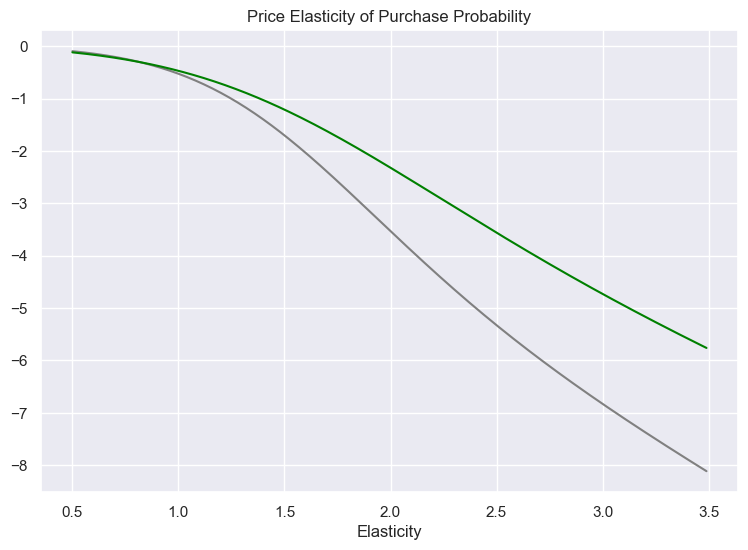

In [38]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.plot(price_range, pe_segment_1, color='green')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

#### Segment 2 - Fewer Opportunities

In [39]:
df_pa_segm_2 = df_pa[df_pa['Segment'] == 2]

In [41]:
Y = df_pa_segm_2['Incidence']

X = pd.DataFrame()

X['Mean_Price'] = (
    df_pa_segm_2['Price_1'] +
    df_pa_segm_2['Price_2'] +
    df_pa_segm_2['Price_3'] +
    df_pa_segm_2['Price_4'] +
    df_pa_segm_2['Price_5']
) / 5

model_incidence_segment_2 = LogisticRegression(solver='sag')
model_incidence_segment_2.fit(X, Y)

model_incidence_segment_2.coef_
Y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:, 1]
pe_segment_2 = model_incidence_segment_2.coef_[:, 0] * price_range * (1 - purchase_pr_segment_2)

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [42]:
df_price_elasticities['PE_Segment_2'] = pe_segment_2
df_price_elasticities

,0,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096494,-0.119004,-0.168020
1,0.51,-0.100566,-0.123184,-0.172944
2,0.52,-0.104765,-0.127458,-0.177938
3,0.53,-0.109094,-0.131826,-0.183004
4,0.54,-0.113557,-0.136291,-0.188140
...,...,...,...,...
295,3.45,-8.012939,-5.680928,-4.021718
296,3.46,-8.038187,-5.701088,-4.036585
297,3.47,-8.063400,-5.721211,-4.051435
298,3.48,-8.088579,-5.741297,-4.066269


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

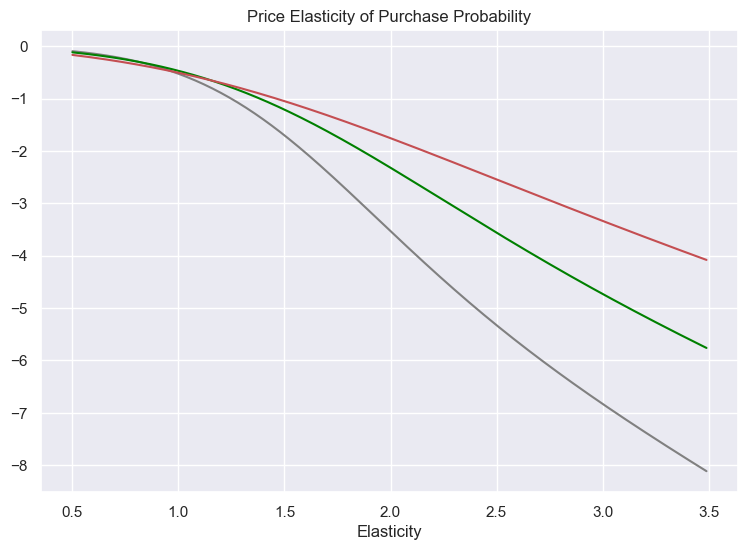

In [44]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.plot(price_range, pe_segment_1, color='green')
plt.plot(price_range, pe_segment_2, color='r')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability with Promotion Feature

#### Data preparation

In [45]:
Y = df_pa['Incidence']

In [47]:
X = pd.DataFrame()
X['Mean_Price'] = (
    df_pa['Price_1'] +
    df_pa['Price_2'] +
    df_pa['Price_3'] +
    df_pa['Price_4'] +
    df_pa['Price_5']
) / 5

In [48]:
X['Mean_Promotion'] = (
    df_pa['Promotion_1'] +
    df_pa['Promotion_2'] +
    df_pa['Promotion_3'] +
    df_pa['Promotion_4'] +
    df_pa['Promotion_5']
) / 5

In [49]:
X

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0
...,...,...
58688,2.060,0.2
58689,2.060,0.0
58690,2.086,0.0
58691,2.092,0.0


#### Model Estimation

In [50]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.4940109 ,  0.56141647]])

#### Price Elasticity with Promotion

In [54]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns={0:"Price_Range"})

In [55]:
df_price_elasticity_promotion['Promotion'] = 1

In [56]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion
